In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for better viewing of DataFrames
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [35]:
df = pd.read_csv('BCG.csv')

In [36]:
print("First 10 rows of the DataFrame:")
df.head(10)

First 10 rows of the DataFrame:


,Company,Fiscal Year End Date,Total Revenue,Net Income,Total Assets,Total Libalities,Cash Flow from operating activities,Units
0,Microsoft,2023-06-30,"211,915.00","72,361.00","411,976.00","205,753.00","87,582.00",Millions
1,Microsoft,2022-06-30,"198,270.00","72,738.00","364,840.00","333,779.00","89,035.00",Millions
2,Microsoft,2021-06-30,"168,088.00","61,271.00","333,779.00","191,791.00","76,740.00",Millions
3,Microsoft,2020-06-30,"143,015.00","44,281.00","301,311.00","183,007.00","60,675.00",Millions
4,Tesla,2023-12-31,"96,773.00","14,997.00","106,618.00","43,009.00","13,256.00",Millions
5,Tesla,2022-12-31,"81,462.00","12,556.00","82,338.00","36,440.00","14,724.00",Millions
6,Tesla,2021-12-31,"53,823.00","5,644.00","62,131.00","30,548.00","11,497.00",Millions
7,Tesla,2020-12-31,"31,536.00",862.00,"52,148.00","14,248.00","5,943.00",Millions
8,Apple,2023-09-30,"383,285.00","96,995.00","352,583.00","290,437.00","110,543.00",Millions
9,Apple,2022-09-24,"394,382.00","99,803.00","352,755.00","302,083.00","122,151.00",Millions


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Company                              12 non-null     object
 1   Fiscal Year End Date                 12 non-null     object
 2   Total Revenue                        12 non-null     object
 3   Net Income                           12 non-null     object
 4   Total Assets                         12 non-null     object
 5   Total Libalities                     12 non-null     object
 6   Cash Flow from operating activities  12 non-null     object
 7   Units                                12 non-null     object
dtypes: object(8)
memory usage: 900.0+ bytes


In [38]:
print("\nDescriptive Statistics for Numerical Columns:")
df.describe()



Descriptive Statistics for Numerical Columns:


,Company,Fiscal Year End Date,Total Revenue,Net Income,Total Assets,Total Libalities,Cash Flow from operating activities,Units
count,12,12,12,12,12,12,12,12
unique,3,12,12,12,12,12,12,1
top,Microsoft,2023-06-30,"211,915.00","72,361.00","411,976.00","205,753.00","87,582.00",Millions
freq,4,1,1,1,1,1,1,12


In [39]:
df.dtypes


Company                                object
Fiscal Year End Date                   object
Total Revenue                          object
Net Income                             object
Total Assets                           object
Total Libalities                       object
Cash Flow from operating activities    object
Units                                  object
dtype: object

In [40]:
financial_cols = [
    'Total Revenue',
    'Net Income',
    'Total Assets',
    'Total Libalities',
    'Cash Flow from operating activities'
]

for col in financial_cols:
    # Remove any non-numeric characters (like commas, dollar signs, spaces)
    # Then convert to numeric, coercing errors to NaN
    if df[col].dtype == 'object': # Only attempt if it's not already numeric
        df[col] = df[col].astype(str).str.replace(r'[$,]', '', regex=True) # Remove $ and ,
        df[col] = pd.to_numeric(df[col], errors='coerce')

print("\nData types after converting financial columns:")
print(df.dtypes)


Data types after converting financial columns:
Company                                 object
Fiscal Year End Date                    object
Total Revenue                          float64
Net Income                             float64
Total Assets                           float64
Total Libalities                       float64
Cash Flow from operating activities    float64
Units                                   object
dtype: object


In [41]:
df.isnull().sum()

Company                                0
Fiscal Year End Date                   0
Total Revenue                          0
Net Income                             0
Total Assets                           0
Total Libalities                       0
Cash Flow from operating activities    0
Units                                  0
dtype: int64

In [42]:
print(f"\nNumber of duplicate rows before removal: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")


Number of duplicate rows before removal: 0
Number of duplicate rows after removal: 0


In [45]:
# Ensure 'Fiscal Year End Date' can be used for sorting
# Assuming 'Fiscal Year End Date' column contains values like '2024-06-30'
df['Fiscal Year End Date'] = pd.to_datetime(df['Fiscal Year End Date'])
df['Fiscal_Year'] = df['Fiscal Year End Date'].dt.year

# Sort data for correct pct_change calculation
df.sort_values(by=['Company', 'Fiscal_Year'], inplace=True)

# Calculate year-over-year percentage changes
df['Revenue Growth (%)'] = df.groupby('Company')['Total Revenue'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby('Company')['Net Income'].pct_change() * 100
df['Assets Growth (%)'] = df.groupby('Company')['Total Assets'].pct_change() * 100
df['Libalities Growth (%)'] = df.groupby('Company')['Total Libalities'].pct_change() * 100
df['Cash Flow from operating activities (%)'] = df.groupby('Company')['Cash Flow from operating activities'].pct_change() * 100

# Calculate Financial Ratios (included for completeness, as these were part of previous steps)
df['Net Profit Margin'] = (df['Net Income'] / df['Total Revenue']) * 100
df['Debt-to-Assets Ratio'] = (df['Total Libalities'] / df['Total Assets']) * 100

# Get the list of all calculated columns (growth metrics and ratios)
calculated_cols_to_display = [
    'Revenue Growth (%)',
    'Net Income Growth (%)',
    'Assets Growth (%)',
    'Libalities Growth (%)',
    'Cash Flow from operating activities (%)',
    'Net Profit Margin',
    'Debt-to-Assets Ratio'
]

# Select the most recent 3 fiscal years for each company
df.groupby('Company').tail(3).copy()


,Company,Fiscal Year End Date,Total Revenue,Net Income,Total Assets,Total Libalities,Cash Flow from operating activities,Units,Fiscal_Year,Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Libalities Growth (%),Cash Flow from operating activities (%),Net Profit Margin,Debt-to-Assets Ratio
10,Apple,2021-09-25,365817.0,94680.0,351002.0,287912.0,104038.0,Millions,2021,33.259385,64.916131,8.371412,11.356841,28.961004,25.881793,82.025743
9,Apple,2022-09-24,394382.0,99803.0,352755.0,302083.0,122151.0,Millions,2022,7.808549,5.410858,0.499427,4.921990,17.409985,25.306175,85.635356
8,Apple,2023-09-30,383285.0,96995.0,352583.0,290437.0,110543.0,Millions,2023,-2.813769,-2.813543,-0.048759,-3.855232,-9.502992,25.306234,82.374079
2,Microsoft,2021-06-30,168088.0,61271.0,333779.0,191791.0,76740.0,Millions,2021,17.531727,38.368601,10.775577,4.799816,26.477132,36.451740,57.460475
1,Microsoft,2022-06-30,198270.0,72738.0,364840.0,333779.0,89035.0,Millions,2022,17.956071,18.715216,9.305858,74.032671,16.021631,36.686337,91.486405
0,Microsoft,2023-06-30,211915.0,72361.0,411976.0,205753.0,87582.0,Millions,2023,6.882030,-0.518299,12.919636,-38.356517,-1.631942,34.146238,49.942958
6,Tesla,2021-12-31,53823.0,5644.0,62131.0,30548.0,11497.0,Millions,2021,70.671613,554.756381,19.143591,114.402021,93.454484,10.486223,49.167082
5,Tesla,2022-12-31,81462.0,12556.0,82338.0,36440.0,14724.0,Millions,2022,51.351653,122.466336,32.523217,19.287678,28.068192,15.413322,44.256601
4,Tesla,2023-12-31,96773.0,14997.0,106618.0,43009.0,13256.0,Millions,2023,18.795267,19.440905,29.488207,18.026894,-9.970117,15.497091,40.339342


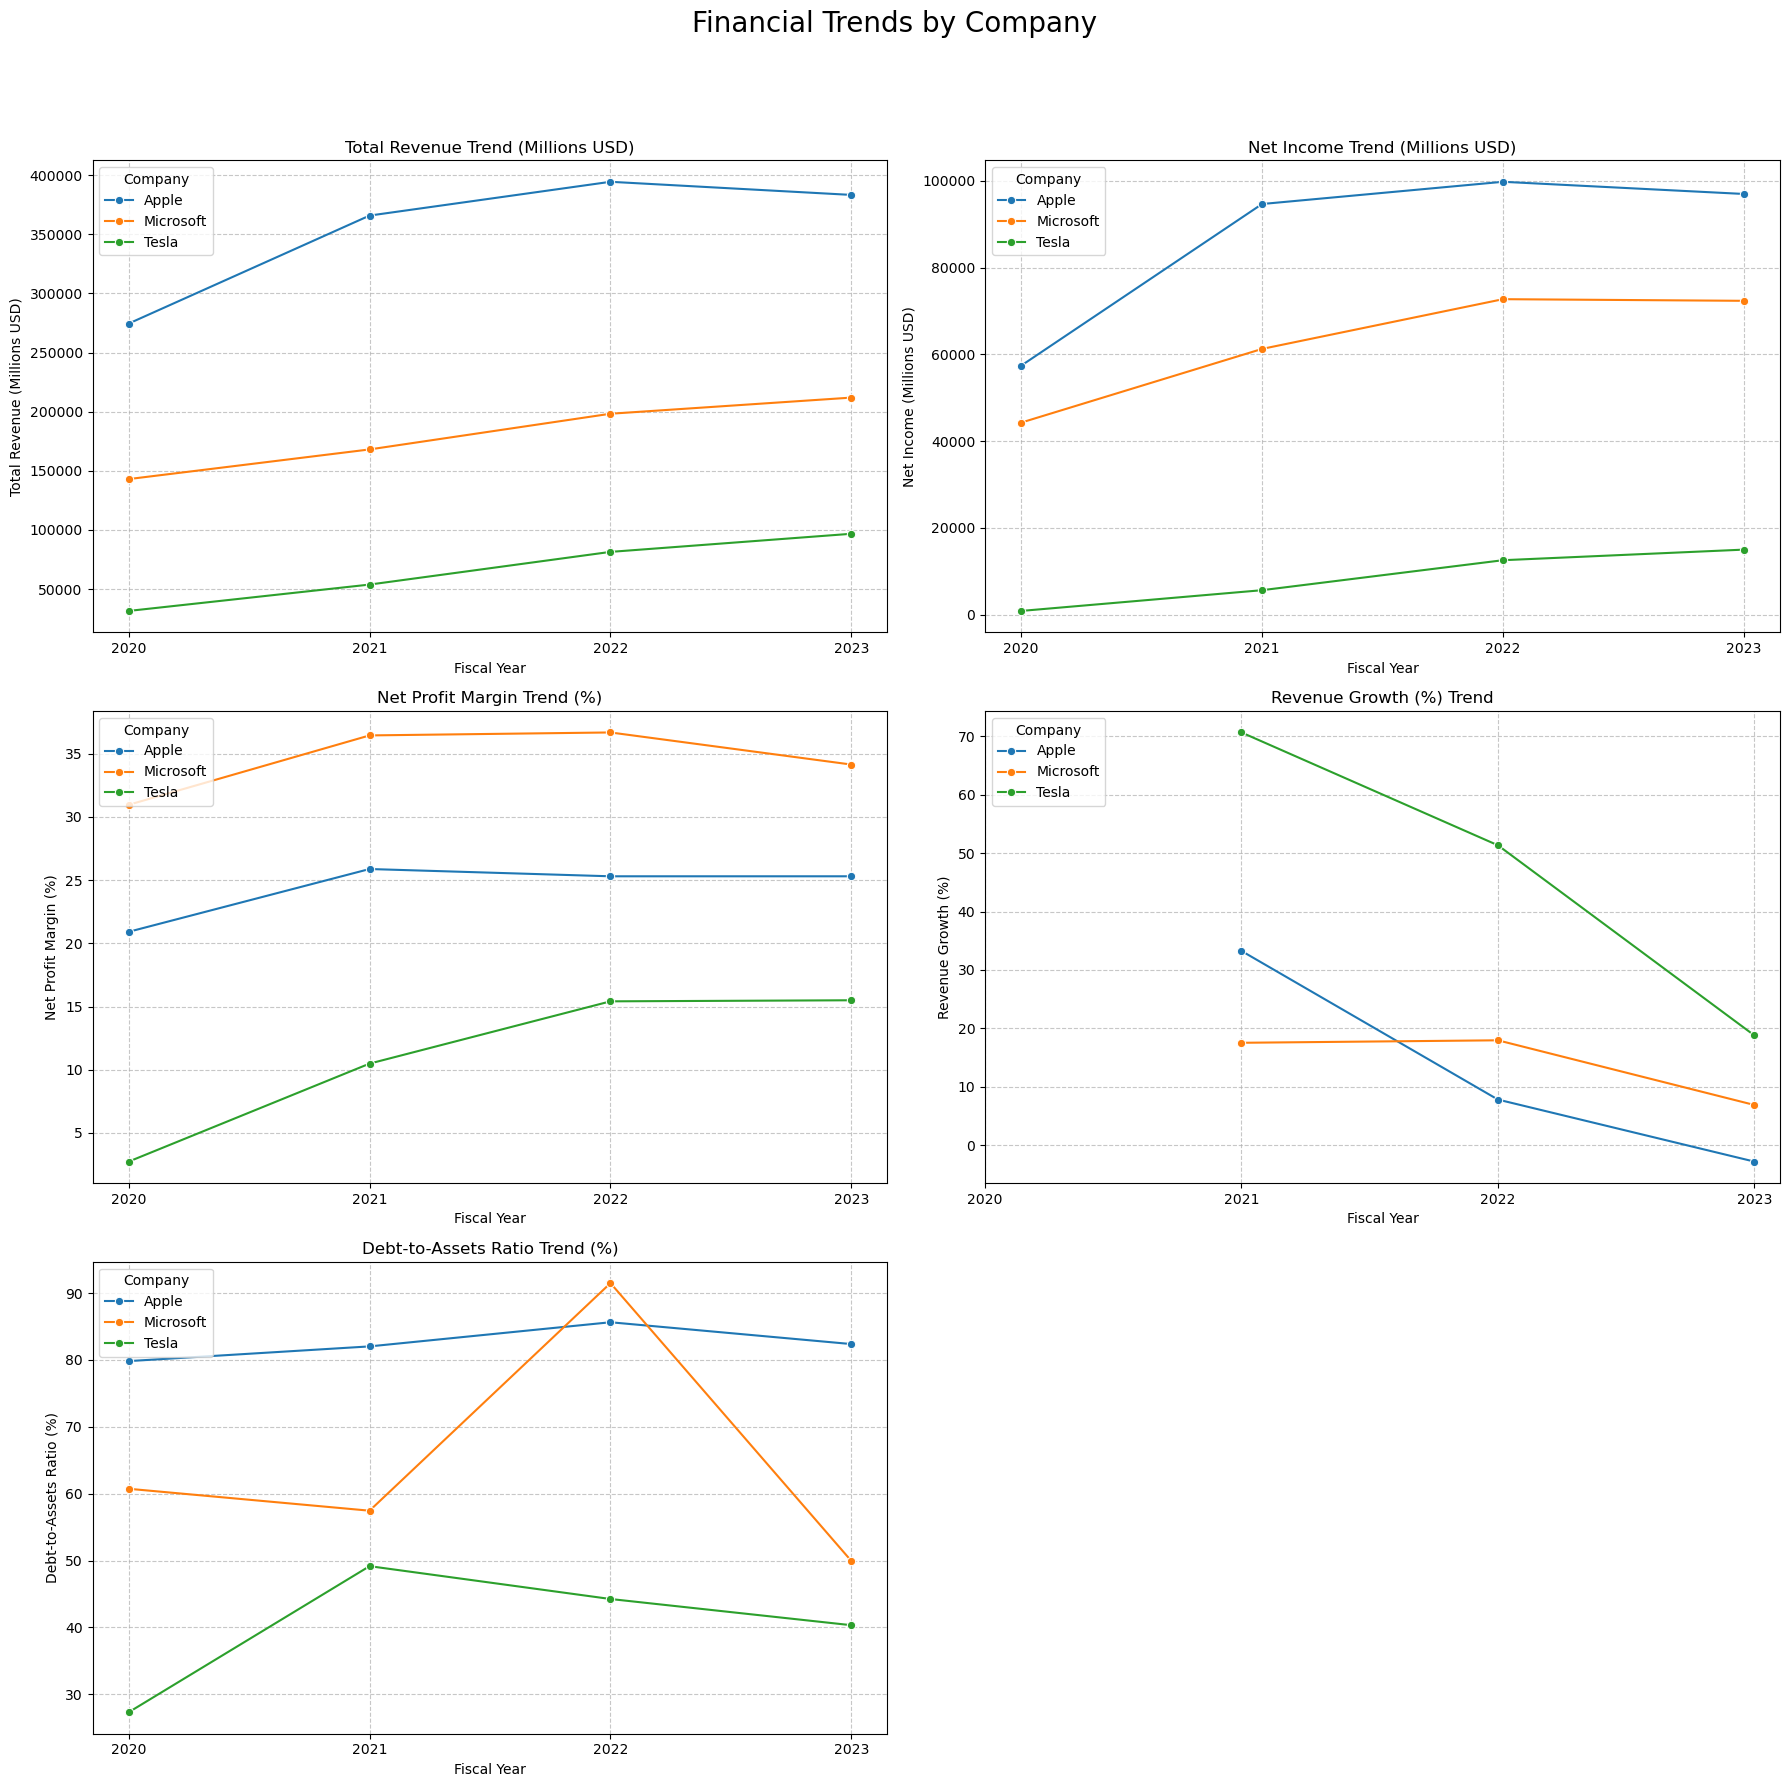

Subplots for financial trends generated and saved as 'Financial_Trends_Subplots.png'.


In [49]:
# Define the metrics to plot and their titles/labels
plot_metrics = [
    {'column': 'Total Revenue', 'title': 'Total Revenue Trend (Millions USD)', 'ylabel': 'Total Revenue (Millions USD)'},
    {'column': 'Net Income', 'title': 'Net Income Trend (Millions USD)', 'ylabel': 'Net Income (Millions USD)'},
    {'column': 'Net Profit Margin', 'title': 'Net Profit Margin Trend (%)', 'ylabel': 'Net Profit Margin (%)'},
    {'column': 'Revenue Growth (%)', 'title': 'Revenue Growth (%) Trend', 'ylabel': 'Revenue Growth (%)'},
    {'column': 'Debt-to-Assets Ratio', 'title': 'Debt-to-Assets Ratio Trend (%)', 'ylabel': 'Debt-to-Assets Ratio (%)'}
]

# Create a figure and a 3x2 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 18)) # Adjust figsize as needed
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Iterate through the metrics and create a line plot in each subplot
for i, metric_info in enumerate(plot_metrics):
    ax = axes[i]
    sns.lineplot(data=df, x='Fiscal_Year', y=metric_info['column'], hue='Company', marker='o', ax=ax)
    ax.set_title(metric_info['title'])
    ax.set_xlabel('Fiscal Year')
    ax.set_ylabel(metric_info['ylabel'])
    ax.set_xticks(df['Fiscal_Year'].unique())
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(title='Company', loc='upper left')

# Hide any unused subplots (if nrows * ncols > number of plots)
if len(plot_metrics) < len(axes):
    for i in range(len(plot_metrics), len(axes)):
        fig.delaxes(axes[i])

plt.suptitle('Financial Trends by Company', fontsize=20, y=1.02) # Overall title
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent title overlap
plt.savefig('Financial_Trends_Subplots.png')
plt.show()

print("Subplots for financial trends generated and saved as 'Financial_Trends_Subplots.png'.")


--- Generating Distribution Plots (Histogram and Box Plot side-by-side for each numeric column) ---


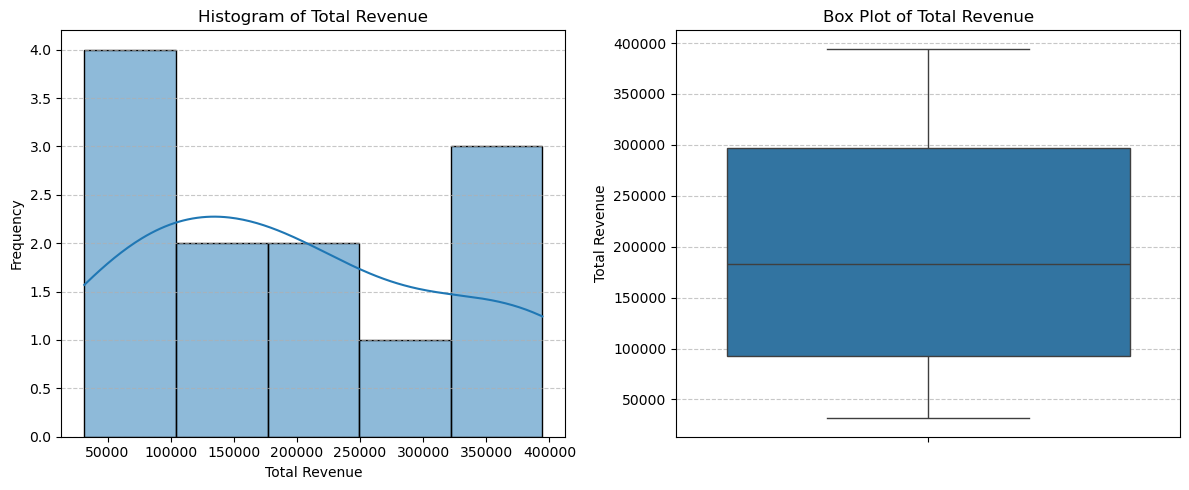

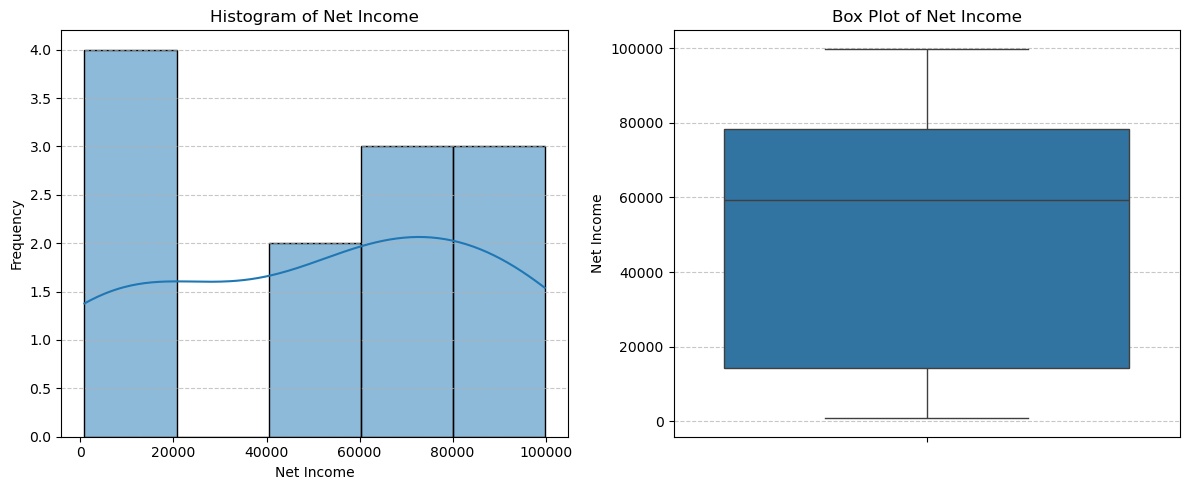

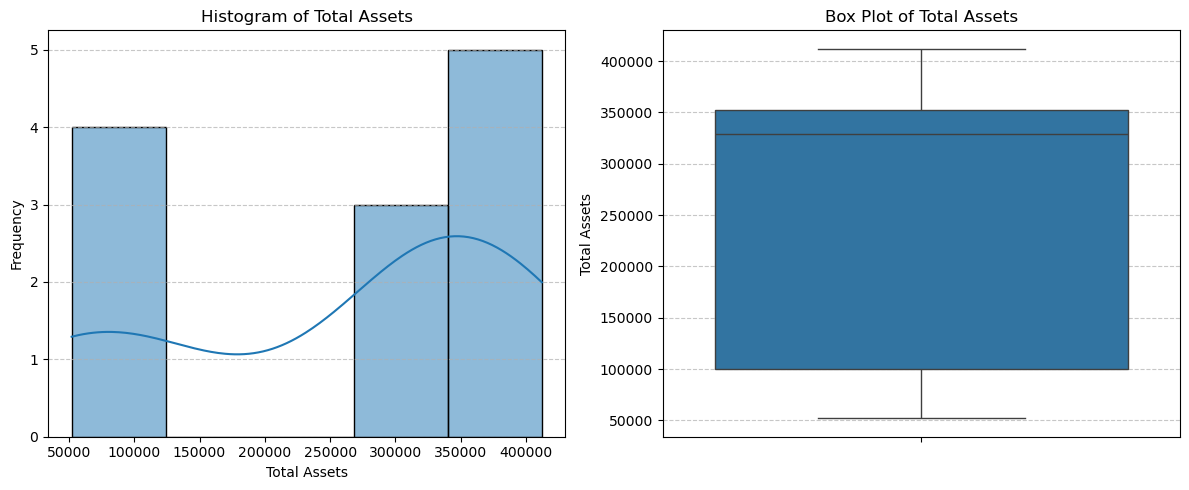

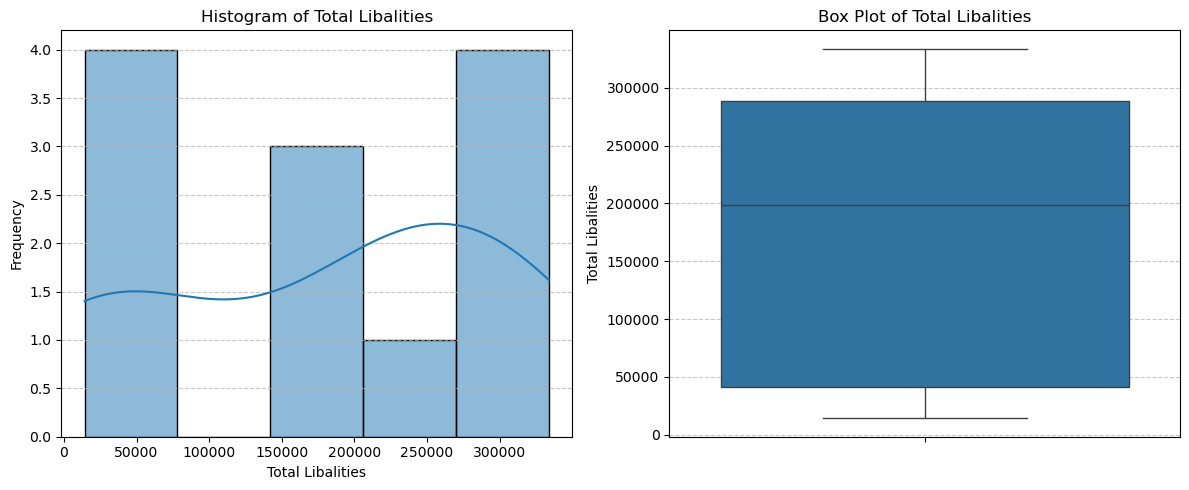

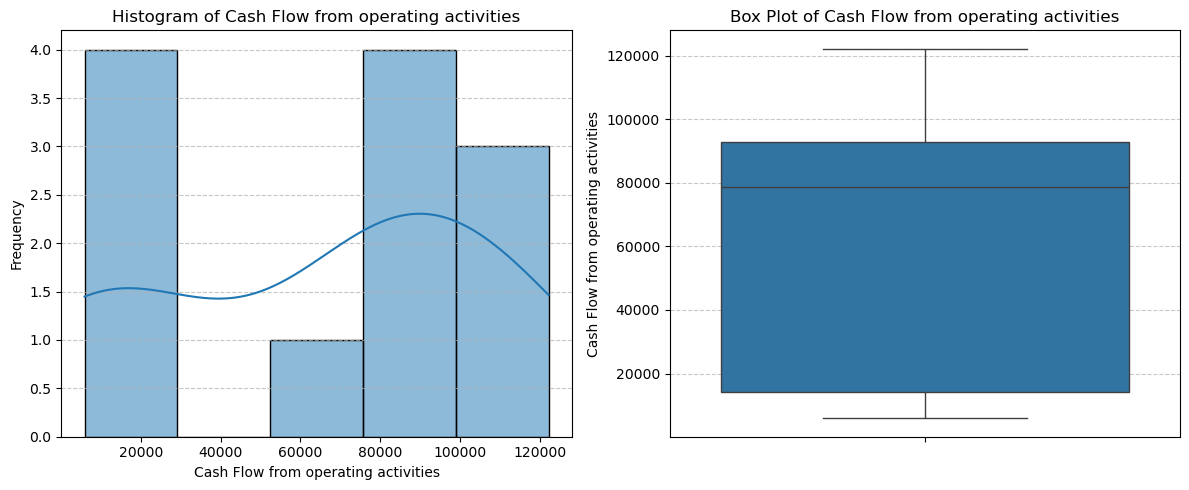

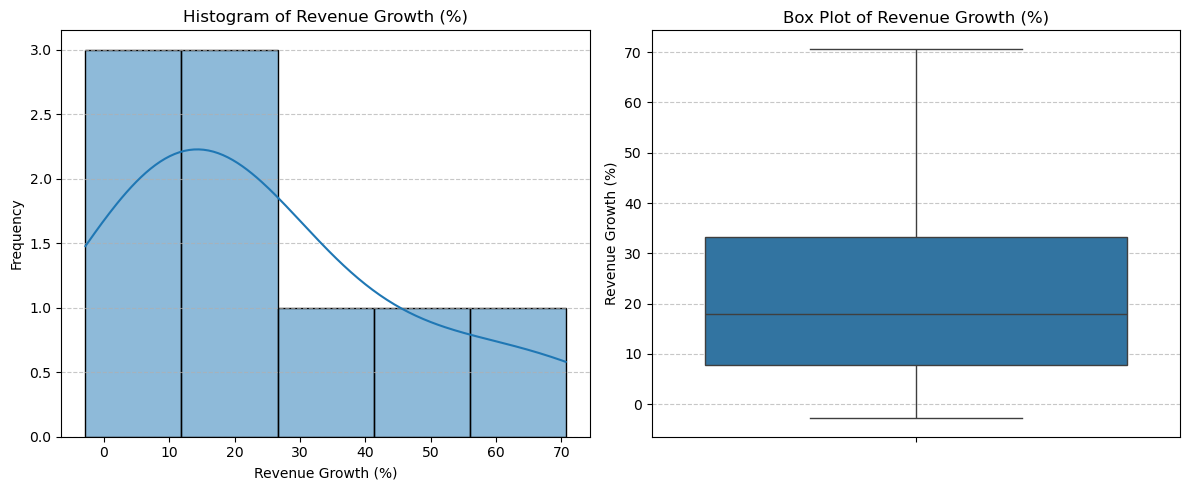

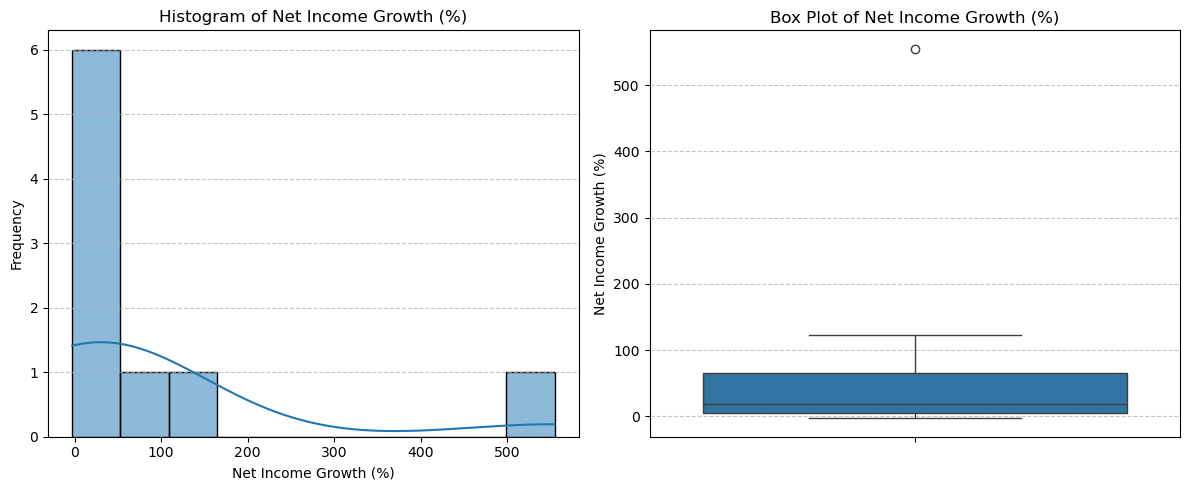

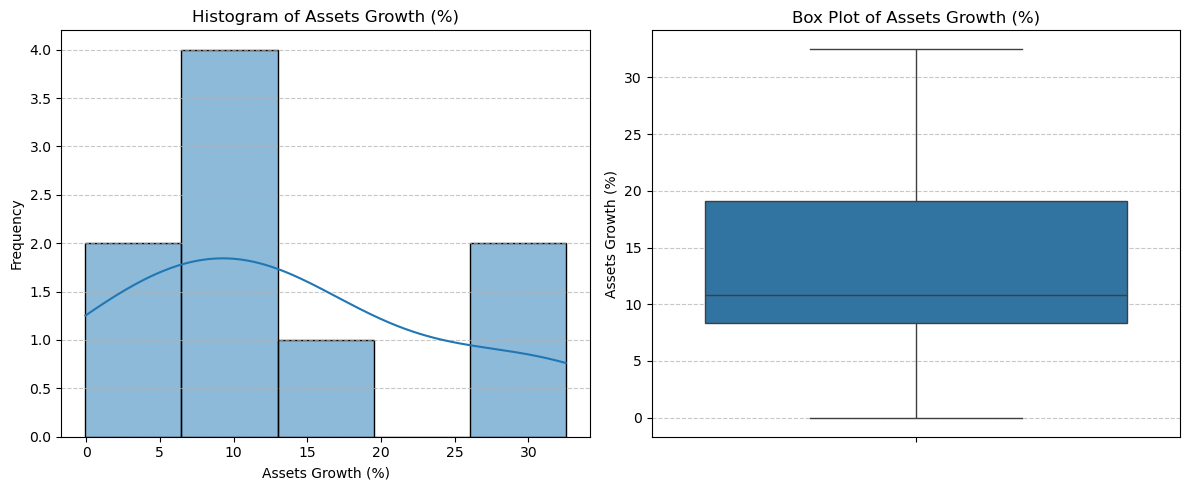

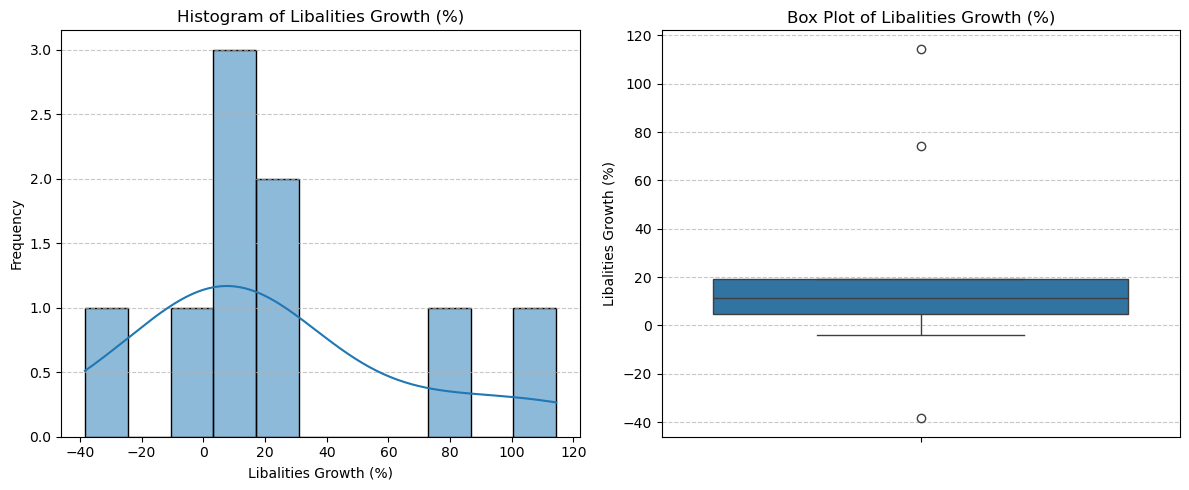

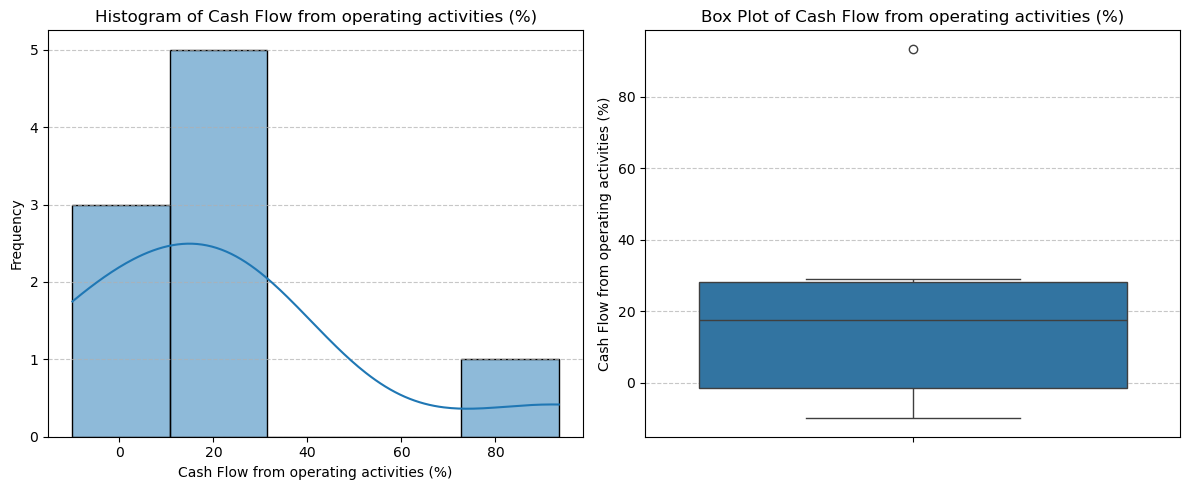

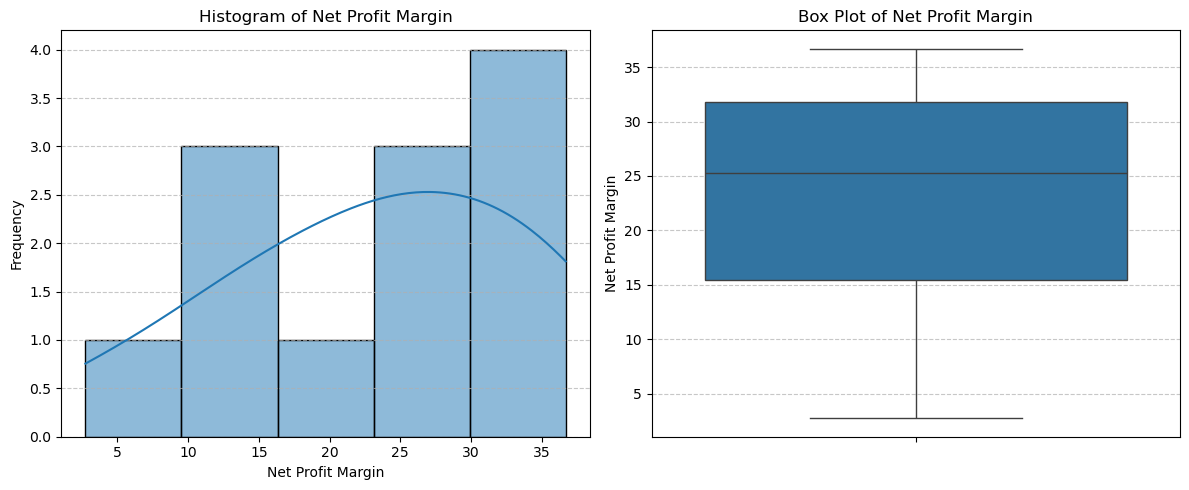

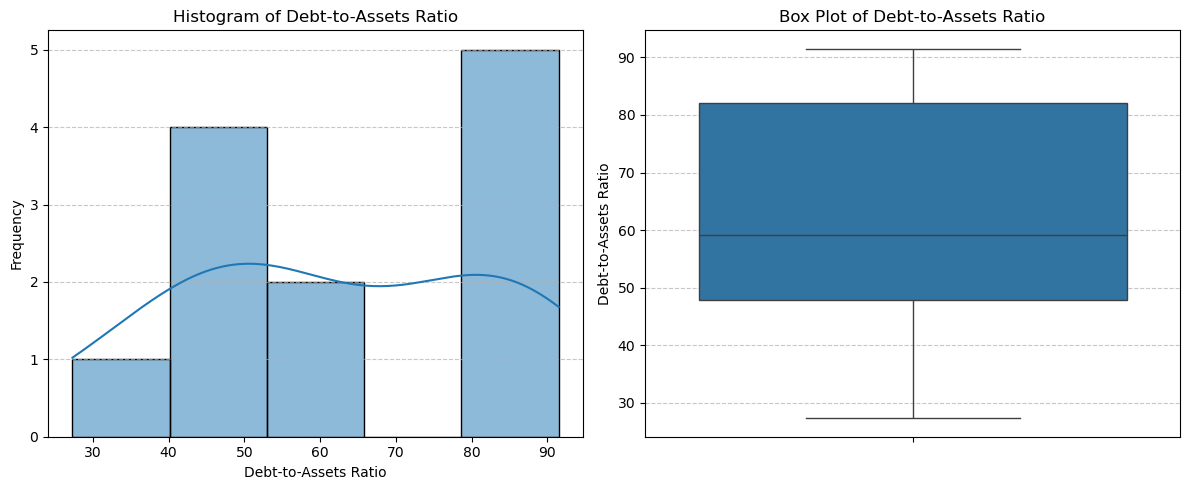

Individual plots (histogram and box plot side-by-side) for each numeric column have been generated and saved.


In [58]:
# --- Distribution Analysis (Histograms and Box Plots for each numeric column) ---

numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
# Exclude 'Fiscal_Year' as its distribution isn't typically analyzed this way
if 'Fiscal_Year' in numeric_cols:
    numeric_cols.remove('Fiscal_Year')

print("\n--- Generating Distribution Plots (Histogram and Box Plot side-by-side for each numeric column) ---")

for col in numeric_cols:
    plt.figure(figsize=(12, 5))

    # Create the first subplot for the Histogram
    plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
    sns.histplot(df[col].dropna(), kde=True) # dropna() to avoid issues with NaN in plotting
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Create the second subplot for the Box Plot
    plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
    sns.boxplot(y=df[col].dropna())
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
    plt.savefig(f'Distribution_{col}.png')
    plt.show() # Close the figure to free memory

print("Individual plots (histogram and box plot side-by-side) for each numeric column have been generated and saved.")


--- Generating a Grid of Distribution Plots (6 rows x 4 columns) ---


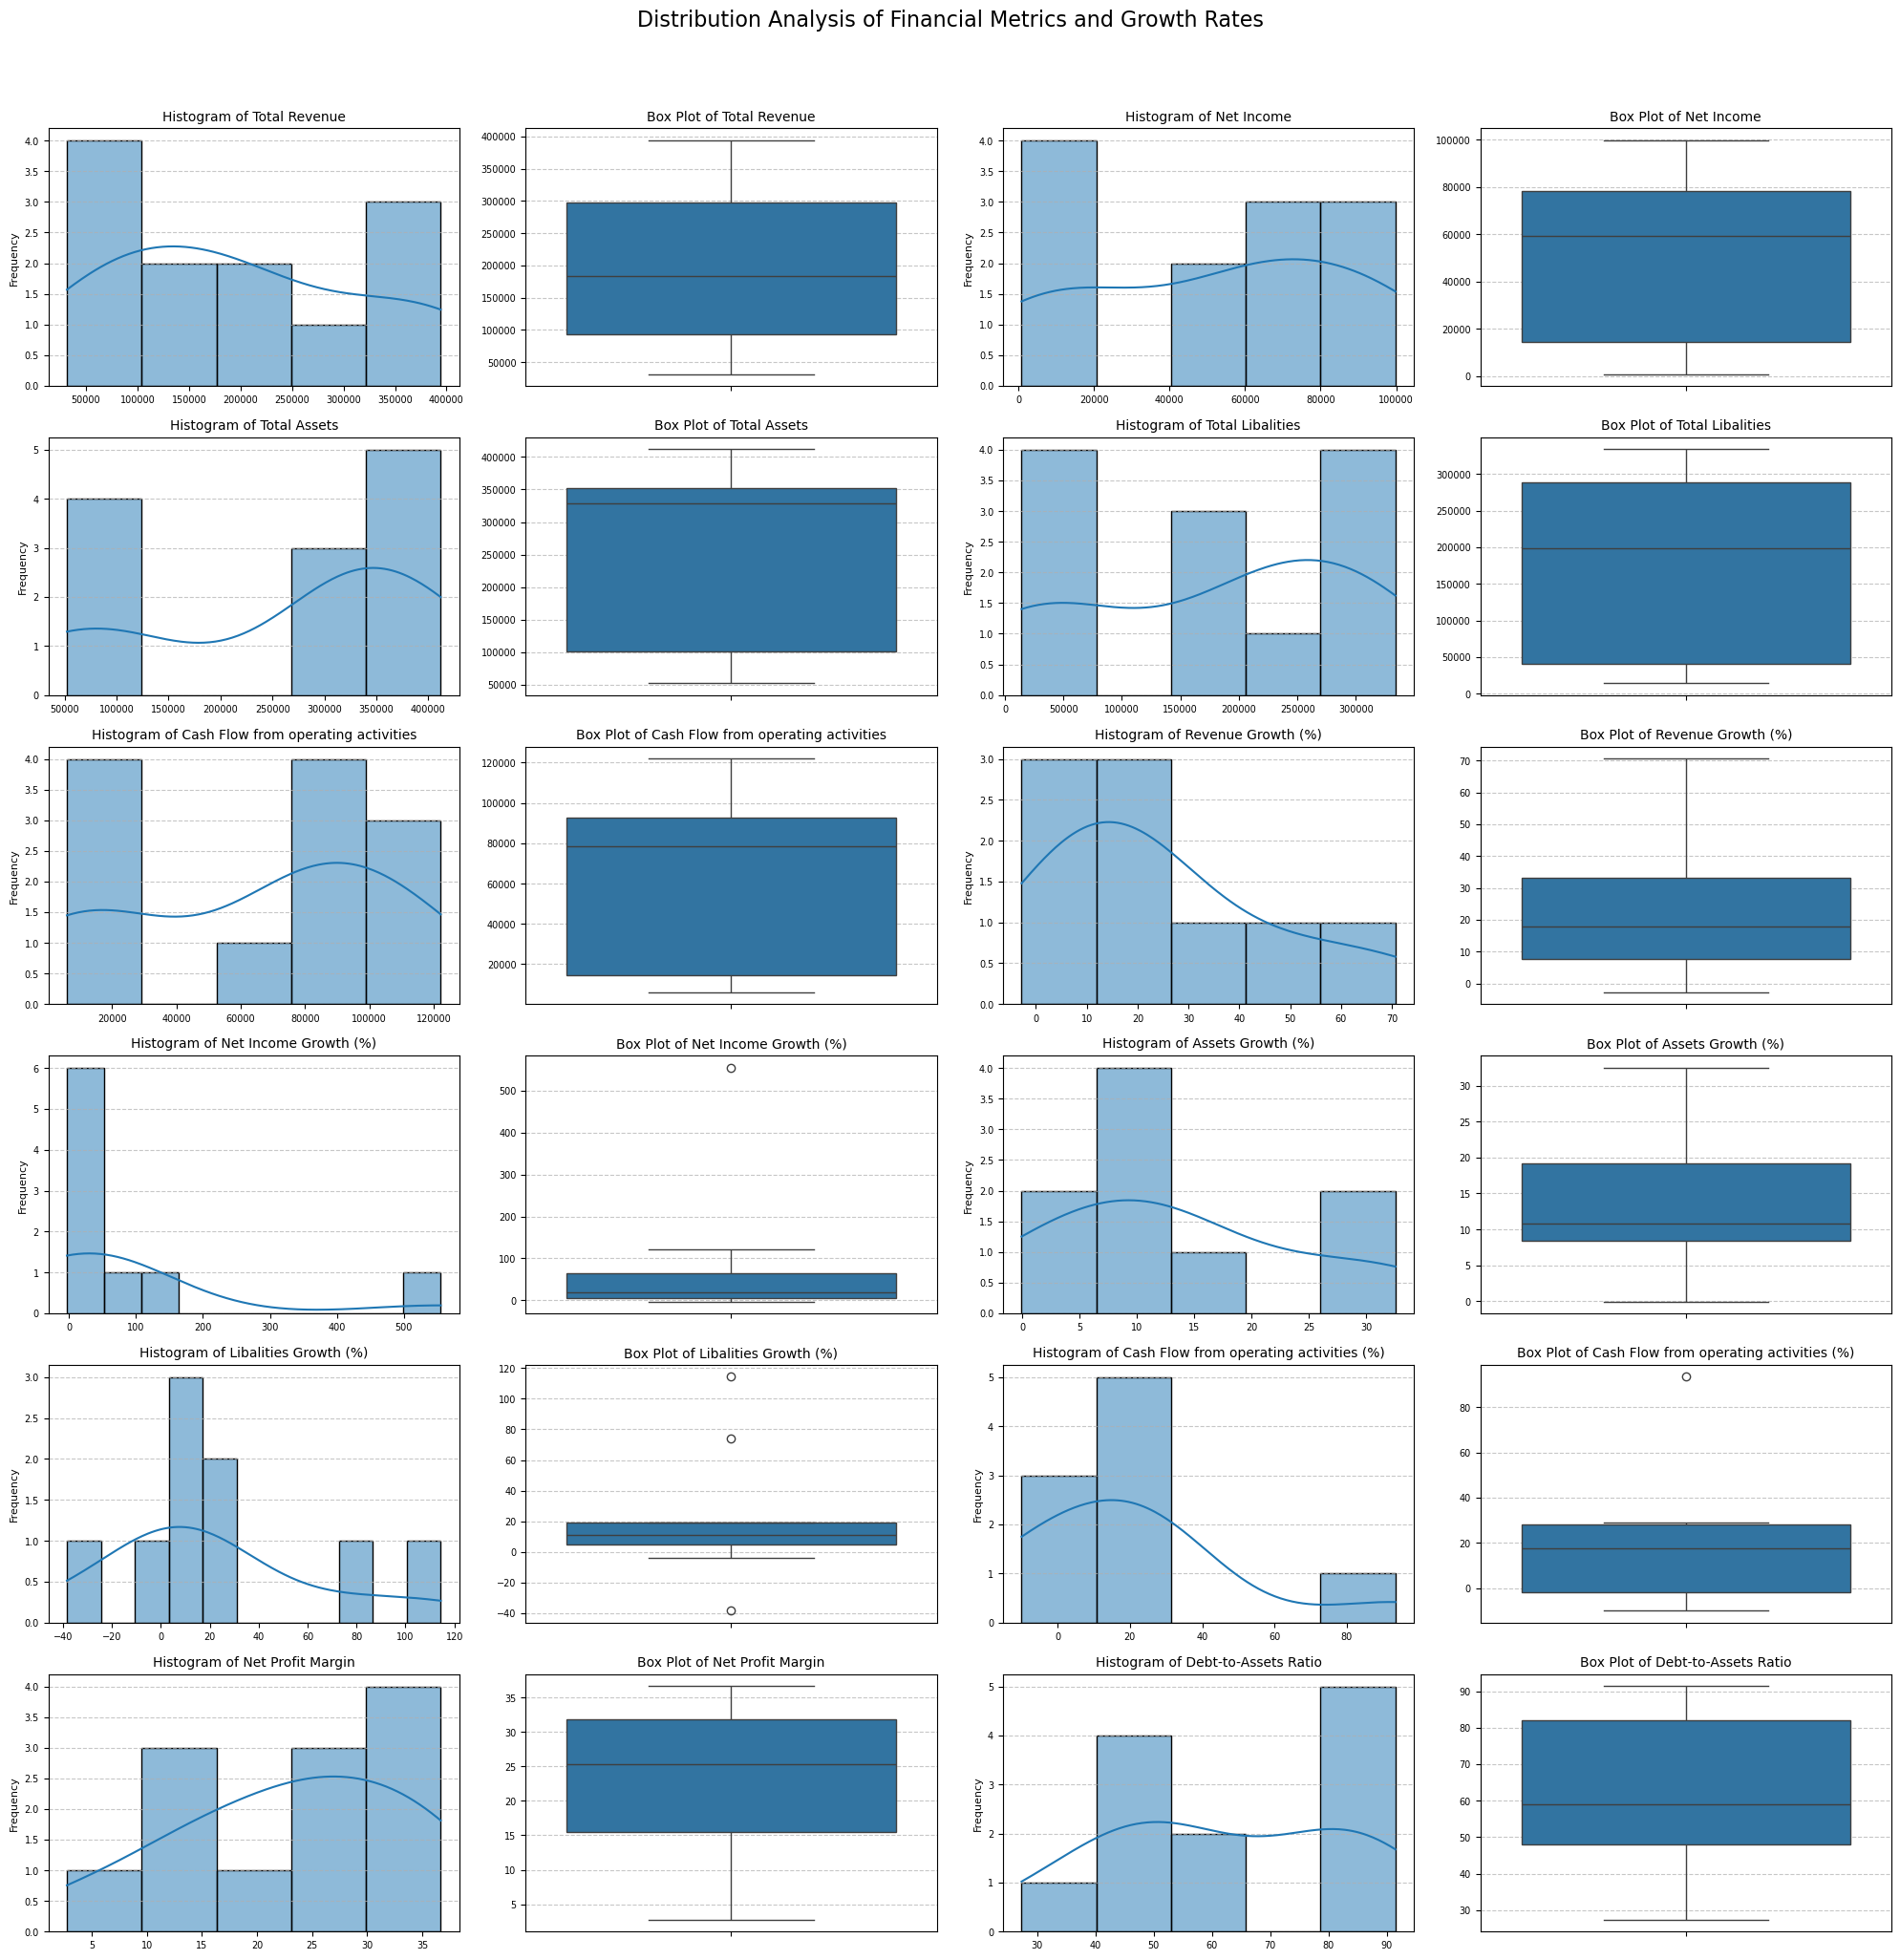

In [59]:
# --- Distribution Analysis (Histograms and Box Plots for each numeric column) ---

numeric_cols_to_plot = df.select_dtypes(include=np.number).columns.tolist()
# Exclude 'Fiscal_Year' as its distribution isn't typically analyzed this way for general distributions
if 'Fiscal_Year' in numeric_cols_to_plot:
    numeric_cols_to_plot.remove('Fiscal_Year')

# Determine grid dimensions for all subplots
num_metrics = len(numeric_cols_to_plot)
num_subplots_per_metric = 2 # for histogram and boxplot
total_plots = num_metrics * num_subplots_per_metric

# Let's arrange them in a grid of 4 columns (2 pairs of hist/boxplot per row)
ncols = 4
nrows = int(np.ceil(total_plots / ncols))

# Create the figure and subplots
# Adjust figsize to avoid overlap and minimize scrolling
fig, axes = plt.subplots(nrows, ncols, figsize=(20, nrows * 3.5))

# Flatten the axes array for easier iteration, regardless of its original shape
axes = axes.flatten()

print(f"\n--- Generating a Grid of Distribution Plots ({nrows} rows x {ncols} columns) ---")

# Iterate through each numeric column and plot its histogram and boxplot
for i, col in enumerate(numeric_cols_to_plot):
    # Histogram subplot
    ax_hist = axes[i * num_subplots_per_metric]
    sns.histplot(df[col].dropna(), kde=True, ax=ax_hist)
    ax_hist.set_title(f'Histogram of {col}', fontsize=10) # Smaller title for subplot
    ax_hist.set_xlabel('') # Remove x-label to reduce clutter across subplots
    ax_hist.set_ylabel('Frequency', fontsize=8)
    ax_hist.tick_params(axis='x', labelsize=7)
    ax_hist.tick_params(axis='y', labelsize=7)
    ax_hist.grid(axis='y', linestyle='--', alpha=0.7)

    # Box Plot subplot
    ax_box = axes[i * num_subplots_per_metric + 1]
    sns.boxplot(y=df[col].dropna(), ax=ax_box)
    ax_box.set_title(f'Box Plot of {col}', fontsize=10) # Smaller title
    ax_box.set_ylabel('') # Remove y-label to reduce clutter
    ax_box.tick_params(axis='y', labelsize=7)
    ax_box.grid(axis='y', linestyle='--', alpha=0.7)

# Remove any unused subplots if total_plots is not a perfect multiple of ncols
for j in range(total_plots, len(axes)):
    fig.delaxes(axes[j])

# Add a super title for the entire figure
plt.suptitle('Distribution Analysis of Financial Metrics and Growth Rates', y=1.005, fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent overlap, leaving space for suptitle

# Display the plot in the output
plt.show()


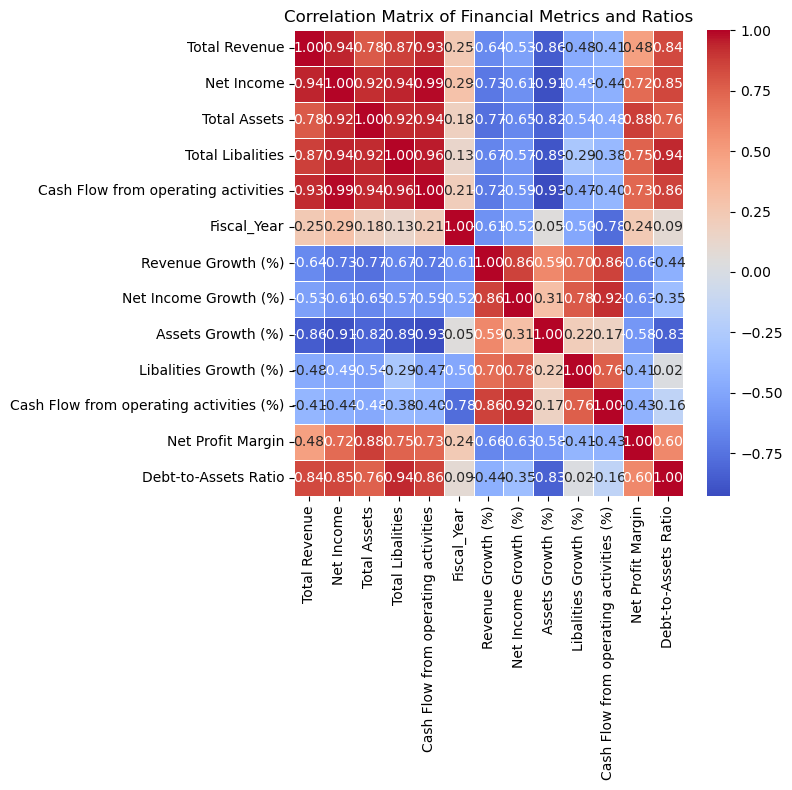

In [61]:
# Assuming 'df' is already prepared from the prerequisite block

# Select only numeric columns for correlation
df_numeric = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Financial Metrics and Ratios')
plt.tight_layout()
plt.savefig('Correlation_Matrix.png')
plt.show()

In [69]:
# Assuming 'df' is already prepared from the prerequisite block

print("\n--- Outlier Detection using IQR Method ---")

# Define a function to find outliers based on IQR
def find_iqr_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers

numeric_cols_for_outliers = df.select_dtypes(include=np.number).columns.tolist()
if 'Fiscal_Year' in numeric_cols_for_outliers:
    numeric_cols_for_outliers.remove('Fiscal_Year')

# Iterate through numeric columns and find outliers
for col in numeric_cols_for_outliers:
    # Drop NaNs for outlier detection in growth rates for meaningful calculation
    series_without_nan = df[col].dropna()
    outliers = find_iqr_outliers(series_without_nan)
    if not outliers.empty:
        print(f"\nOutliers detected in '{col}':")
        # Display the actual rows where outliers occur for context
        # Merge back to original df to get company and year context
        outlier_data = df[df[col].isin(outliers)]
        print(outlier_data[['Company', 'Fiscal_Year', col]])
    else:
        print(f"\nNo outliers detected in '{col}' based on IQR.")


--- Outlier Detection using IQR Method ---

No outliers detected in 'Total Revenue' based on IQR.

No outliers detected in 'Net Income' based on IQR.

No outliers detected in 'Total Assets' based on IQR.

No outliers detected in 'Total Libalities' based on IQR.

No outliers detected in 'Cash Flow from operating activities' based on IQR.

No outliers detected in 'Revenue Growth (%)' based on IQR.

Outliers detected in 'Net Income Growth (%)':
  Company  Fiscal_Year  Net Income Growth (%)
6   Tesla         2021             554.756381

No outliers detected in 'Assets Growth (%)' based on IQR.

Outliers detected in 'Libalities Growth (%)':
     Company  Fiscal_Year  Libalities Growth (%)
1  Microsoft         2022              74.032671
0  Microsoft         2023             -38.356517
6      Tesla         2021             114.402021

Outliers detected in 'Cash Flow from operating activities (%)':
  Company  Fiscal_Year  Cash Flow from operating activities (%)
6   Tesla         2021        